<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Goals-&amp;-Methodology" data-toc-modified-id="Goals-&amp;-Methodology-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goals &amp; Methodology</a></span></li><li><span><a href="#Data-Source-and-Variable-Directory" data-toc-modified-id="Data-Source-and-Variable-Directory-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Source and Variable Directory</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Reading-&amp;-Cleaning-data" data-toc-modified-id="Reading-&amp;-Cleaning-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading &amp; Cleaning data</a></span></li><li><span><a href="#Variable-Analysis" data-toc-modified-id="Variable-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variable Analysis</a></span><ul class="toc-item"><li><span><a href="#Over-Time-(Felix)" data-toc-modified-id="Over-Time-(Felix)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Over Time (Felix)</a></span><ul class="toc-item"><li><span><a href="#Dwelling-Type" data-toc-modified-id="Dwelling-Type-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Dwelling Type</a></span></li><li><span><a href="#Sales-Number" data-toc-modified-id="Sales-Number-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Sales Number</a></span></li><li><span><a href="#Median-Rent" data-toc-modified-id="Median-Rent-2.2.1.3"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>Median Rent</a></span></li><li><span><a href="#New-Bonds" data-toc-modified-id="New-Bonds-2.2.1.4"><span class="toc-item-num">2.2.1.4&nbsp;&nbsp;</span>New Bonds</a></span></li><li><span><a href="#Construction-Costs" data-toc-modified-id="Construction-Costs-2.2.1.5"><span class="toc-item-num">2.2.1.5&nbsp;&nbsp;</span>Construction Costs</a></span></li><li><span><a href="#Bond-Yields" data-toc-modified-id="Bond-Yields-2.2.1.6"><span class="toc-item-num">2.2.1.6&nbsp;&nbsp;</span>Bond Yields</a></span></li><li><span><a href="#Interest-Rates" data-toc-modified-id="Interest-Rates-2.2.1.7"><span class="toc-item-num">2.2.1.7&nbsp;&nbsp;</span>Interest Rates</a></span></li></ul></li><li><span><a href="#By-Postcode" data-toc-modified-id="By-Postcode-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>By Postcode</a></span><ul class="toc-item"><li><span><a href="#Median-Rent" data-toc-modified-id="Median-Rent-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Median Rent</a></span></li><li><span><a href="#New-Bonds" data-toc-modified-id="New-Bonds-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>New Bonds</a></span></li><li><span><a href="#Age-Brackets" data-toc-modified-id="Age-Brackets-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>Age Brackets</a></span></li><li><span><a href="#ATSI" data-toc-modified-id="ATSI-2.2.2.4"><span class="toc-item-num">2.2.2.4&nbsp;&nbsp;</span>ATSI</a></span></li><li><span><a href="#High-Income" data-toc-modified-id="High-Income-2.2.2.5"><span class="toc-item-num">2.2.2.5&nbsp;&nbsp;</span>High Income</a></span></li><li><span><a href="#Year-of-Arrival" data-toc-modified-id="Year-of-Arrival-2.2.2.6"><span class="toc-item-num">2.2.2.6&nbsp;&nbsp;</span>Year of Arrival</a></span></li><li><span><a href="#Non-AUS-Citizen" data-toc-modified-id="Non-AUS-Citizen-2.2.2.7"><span class="toc-item-num">2.2.2.7&nbsp;&nbsp;</span>Non-AUS Citizen</a></span></li></ul></li><li><span><a href="#On-Postcode-Level-and-over-Time-(maybe-use-melt?)" data-toc-modified-id="On-Postcode-Level-and-over-Time-(maybe-use-melt?)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>On Postcode Level and over Time (maybe use melt?)</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Regression-Model-(Chris)" data-toc-modified-id="Baseline-Regression-Model-(Chris)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline Regression Model (Chris)</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Improved-Model" data-toc-modified-id="Improved-Model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Improved Model</a></span></li></ul></li><li><span><a href="#Clustering-(Ken-&amp;-Felix)" data-toc-modified-id="Clustering-(Ken-&amp;-Felix)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering (Ken &amp; Felix)</a></span><ul class="toc-item"><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Kmeans</a></span><ul class="toc-item"><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Scaling the data</a></span></li><li><span><a href="#Optimal-Number-of-K:-Elbow-Method" data-toc-modified-id="Optimal-Number-of-K:-Elbow-Method-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Optimal Number of K: Elbow Method</a></span></li><li><span><a href="#Apply-Algorithm" data-toc-modified-id="Apply-Algorithm-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Apply Algorithm</a></span></li><li><span><a href="#Map" data-toc-modified-id="Map-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Map</a></span></li></ul></li><li><span><a href="#Hierarchical-clustering" data-toc-modified-id="Hierarchical-clustering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hierarchical clustering</a></span><ul class="toc-item"><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Scaling the data</a></span></li><li><span><a href="#Apply-algorithm" data-toc-modified-id="Apply-algorithm-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Apply algorithm</a></span></li><li><span><a href="#Map" data-toc-modified-id="Map-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Map</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Distinct-Models-per-Clusters" data-toc-modified-id="Distinct-Models-per-Clusters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distinct Models per Clusters</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-based-on-KMeans-clusters" data-toc-modified-id="Linear-regression-based-on-KMeans-clusters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear regression based on KMeans clusters</a></span><ul class="toc-item"><li><span><a href="#Data-prep" data-toc-modified-id="Data-prep-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Data prep</a></span></li><li><span><a href="#Model-on-the-2-Clusters" data-toc-modified-id="Model-on-the-2-Clusters-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Model on the 2 Clusters</a></span></li><li><span><a href="#Hyperparameter-Tuning-Using-Grid-Search-Cross-Validation" data-toc-modified-id="Hyperparameter-Tuning-Using-Grid-Search-Cross-Validation-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Hyperparameter Tuning Using Grid Search Cross-Validation</a></span><ul class="toc-item"><li><span><a href="#Cluster-0" data-toc-modified-id="Cluster-0-5.1.3.1"><span class="toc-item-num">5.1.3.1&nbsp;&nbsp;</span>Cluster 0</a></span></li><li><span><a href="#Cluster-1" data-toc-modified-id="Cluster-1-5.1.3.2"><span class="toc-item-num">5.1.3.2&nbsp;&nbsp;</span>Cluster 1</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Assign-class-label---define-'high-growth-potential'-areas" data-toc-modified-id="Assign-class-label---define-'high-growth-potential'-areas-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Assign class label - define 'high growth potential' areas</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Base-model" data-toc-modified-id="Base-model-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Multi-layer-Perceptron-Classifier" data-toc-modified-id="Multi-layer-Perceptron-Classifier-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Multi-layer Perceptron Classifier</a></span><ul class="toc-item"><li><span><a href="#Base-model" data-toc-modified-id="Base-model-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Base model</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Cross Validation</a></span></li></ul></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Tuning-Individual-Parameter" data-toc-modified-id="Tuning-Individual-Parameter-6.3.2.1"><span class="toc-item-num">6.3.2.1&nbsp;&nbsp;</span>Tuning Individual Parameter</a></span></li><li><span><a href="#Tuning-with-GridSearch" data-toc-modified-id="Tuning-with-GridSearch-6.3.2.2"><span class="toc-item-num">6.3.2.2&nbsp;&nbsp;</span>Tuning with GridSearch</a></span></li></ul></li><li><span><a href="#Best-MLPClassifier" data-toc-modified-id="Best-MLPClassifier-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Best MLPClassifier</a></span><ul class="toc-item"><li><span><a href="#Best-MLPClassifier---based-on-individual-tuning" data-toc-modified-id="Best-MLPClassifier---based-on-individual-tuning-6.3.3.1"><span class="toc-item-num">6.3.3.1&nbsp;&nbsp;</span>Best MLPClassifier - based on individual tuning</a></span></li><li><span><a href="#Best-MLPClassifier---based-on-GridSearch" data-toc-modified-id="Best-MLPClassifier---based-on-GridSearch-6.3.3.2"><span class="toc-item-num">6.3.3.2&nbsp;&nbsp;</span>Best MLPClassifier - based on GridSearch</a></span></li></ul></li></ul></li><li><span><a href="#The-Classifier-of-Choice" data-toc-modified-id="The-Classifier-of-Choice-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The Classifier of Choice</a></span></li><li><span><a href="#Analysis-and-Interpretation" data-toc-modified-id="Analysis-and-Interpretation-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Analysis and Interpretation</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion-and-Outlook" data-toc-modified-id="Conclusion-and-Outlook-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion and Outlook</a></span></li></ul></div>

# Introduction

In this note book, we explore various topics related to the NSW property market in the context of the onging COVID pandemic in an attempt to validate or invalidate some common beliefs people hold about the housing market, to list a few:
* Now it's the best time to buy/inevest in a property, the market is crashing!
* Too many people have tried to seize the opportunity, it's not an opportunity anymore... 
* Take advantage of the cheap rent while you can, tenants are the boss these days.

As a group of Data Analysts in training, we surely won't take 'expert opinions' on the news as gospel. Instead, here we've gathered data of property sales and rental activities released by the NSW government as well as demographic and socioeconomic information from credible source to conduct our own analysis. We seek to uncover the real trends of the housing market and identify the driving forces behind these changes in this wild new world we live in.


## Goals & Methodology

**1. Track the trend of house sales and rental activities** 

Plot the number of sales/bonds and median price/rent over the period of Q3 2017 to Q1 2021, aiming to provide insights into following questions: 

* Are more people buying or investing in properties nowadays compared to the pre-COVID period? 
* How have the housing and rental activities changed since COVID? Are there any correlations between both? 
* Are there any differences across geographic areas? What are the most popular and fast growing areas in the housing market?

**2. Identify the correlations between house market activities and selected demographic and socioeconomic features**

* Use correlation matrix to identify features highly correlated to house price and sales and to rule out multicollinearity for modelling
* Plot trended housing data together with time-series features (interest rate and government bond yields) to explore correlation  

**3. Predict house prices**

* Build a linear regression model with 
    * the median house prices of the latest time period (Q1 2021) as target variable
    * number of sales, number of bonds and weekly rent from the same time period, house prices from previous 4 time periods as well as demographic/ socioecnomic features as predictor variablees 
* Use RFE to determine the optimal number of features and select best features 
* Use GridSearchCV to find best parameters for the linear regression model
* Validate model performance using cross validation

**4. Find similar areas**

* Identify clusters of similar LGAs to see if some house prices between the LGAs behave similarly with each other. The two clustering method tested are:
    * K-means clustering
    * Hierarchical clustering
* Build one linear regression model on house price for each cluster, compare the results with the prediction based on the whole sample and decide if regression by cluster provides better performance.

**5. Identify locations with high growth potentials**

* Label postal areas whose house price increase rate of the latest time period (Q1 2021) is greater than 5% as 'high growth' areas 
* Build a classifier to classify postcodes into the high growth potential / low growth potential classes
    * Random Forest
    * Artificial Neural Network
* Optimise classifier through hyperparameter tuning 
* Compare performance of different models and select the best

## Data Source and Variable Directory

**<u>Housing Data</u>**
<br>The housing data used in this analysis was obtained from Resources centre of the [NSW communities & Justice website](https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/back-issues). Data is released on quarterly base and provide information about house sales and rent activities in NSW by postcode and LGA. Here we choose to analyse the data at postcode level to have more robust sample size and greater precision. The raw sales and rent files are stored under <i>'Files/Sales'</i> and <i>'Files/Rent'</i> directoty respectively. </br>

To explore the trends, we've concatenated 15 quarters (from Q3 2017 and Q1 2021) of sales and rent data into one single file (saved under <i>'Files/Cleaned/Housing'</i>, which contains below variables:
* **postcode**: NSW postcodes, unique identifier of geographical areas in the data
* **skey**: the issue number of raw sales reports, starting with an 's' + 3 digit numbers 
* **dwelling_type**: dwelling type by Strata, Non-strata or Total
* **median_price**: the median price of properties sold (in AUD'000s)
* **mean_price**: the mean price of properties sold (in AUD'000s)
* **sales_no**: the number of properties sales made in a given time period
* **rkey**: the issue number of raw rent reports, starting with an 'r' + 3 digit numbers
* **median_rent_newb**: Median Weekly Rent for New Bonds (in AUD)
* **new_bonds_no**:the number of new bonds lodged in a given time period in the area
* **total_bonds_no**: the total number of bonds held in a given time period in the area



<br>**<u>Feature Data</u>**</br>
We've gathered demographic information for different parts of NSW and socioenocomic indicators over the time period of interest from various source, namely:
* 2016 Census from Australian Bureau of Statistics
* Reserve Bank of Australia
* [Yieldbroker](https://www.yieldbroker.com/)

and merged the features into the housing data to create a compelete data set which includes following features:
* **INCP**: Total personal income (Weekly)
    * INCP_LOW: less than \\$749 (AUD) per week (inclusive)
    * INCP_MID: \\$800 - \\$1749 (AUD) per week
    * INCP_HIGH: greater than $1750 (AUD) per week (inclusive)
    * INCP_NEG_NIL: zero or negtive income
* **CPRF**: Count of persons in family, i.e. household sizes, ranging from 2 to 6+ people
* **Population**: Residing population within each postcode area in 2016
    * Population by age group: 0-4yo, 5-14yo, 15-24yo, 25-34yo, 35-54yo, 55-64yo, 65+yo 
    * Population_2016: derived from the sum of all age groups and those preferred not to answer (na)
* **Citizenship**: 
    * Citizen_AU: the number of residents who hold Australian citizenship
    * Citizen_non_AU: the number of residents who hold citizenship of other countries
* **YARRP**: Year of arrival in australia - the number of immigrants/ visa-holding temporary residents who first arrived in australia in the following time period
    * YARRP < 1975: prior to year 1975 (inclusive)
    * YARRP 1976-1995: between year 1976 and 1995
    * YARRP 1996-2005: between year 1996 and 2005
    * YARRP 2006-2016: between year 1996 and August 2016
* **ATSI**: the number of residents who identify as Aboriginal and/or Torres Strait Islanders
* **Bonds%**: yield on Commonwealth Government bonds
    * 2yBonds%: yield on 2 year bond
    * 10yBonds%: yield on 10 year bond
* **Rate**: Interest rate/cash rate (percent)
* **constr_index**: Index of construction-related prices in Australia


## Imports
Import libraries and write settings here.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import 

# import geopandas as gpd
# from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon
import mapclassify

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

The data cleaning function takes a few minutes to complete.

# Analysis

## Reading & Cleaning data
Due to the lenghthiness of data cleaning and merging, we will only give a brief run down of the process here with reference to the location of relevant piece of code.

**Step1. Cleaning of individual house sales and rent data file**
* Read quarterly house sales reports (.xlsx) into individual dataframes, perform necessary checkinng, remove and/or impute null values as needed and add time period and indentifier variables</br>
* Above step is repeated for all 15 sales files, the resulting dataframes are concacted into two due to the slight difference in the raw data format, which are then saved as csv files (`sales_2017_2018.csv` and `sales_2019_2021.csv`) for later usage.
* The same process is performed to quarterly rent reports (.xlsx) and results in `rent_2017_2018.csv` and `rent_2019_2021.csv`. 

This step is captured in <<u>**@CHRIS** INSERT FUNCTION + EXPLAIN A BIT HERE</u>>.

<br>**Step2. Create the master housing data file by merging all sales and rent data**</br>
* First merge the two sales files into one and the two rent files into one
* The complete sales file and the complete rent file is then merged into the master stacked file (each quarter of data is stacked on top of one another) `Master_Sales_Rent_2017Q4_2021Q1.csv`
* Pivot the stacked master file to create an unstacked data file of 5 most recent quarters later modelling (`Pivot_Sales_Rent_5Quarters_Imputed.csv`)

This step is captured in the <i>Data Preparation Pt1 (NSW Housing data)</i> notebook.

<br>**Step3. Clean feature data and merge into the master data files**</br>
* Features mentioned in prior section are read into separate dataframes cleaned individually
* Once processed, the features are merged into the master stacked and unstacked data file using postcode or time period as key. 
* The final complete data files are:
    * Stacked: `Master_Sales_Rent_2017Q4_2021Q1_pcFeatures.csv`
    * Unstacked: `Unstacked_Sales_Rent_5Quarters_Imputed_pcFeatures.csv`
    
This step is captured in the <i>Data Preparation Pt2 (Feature data)</i> notebook.

In [ ]:
#%run chrisDataCleanFunction.ipynb

We get the following DFs:

- `salesNew`
- `salesOld`
- `salesNew_nStrata`
- `salesNew_strata`
- `salesNew_total`
- `salesOld_nStrata`
- `salesOld_strata`
- `salesOld_total`
- `rentNew`
- `rentOld`

In [ ]:
# reading in
master = pd.read_csv("Files/Cleaned/Postcode-based/Master_Sales_Rent_2017Q4_2021Q1_pcFeatures.csv")
pd.set_option('display.max_columns', None)
master.head()

In [ ]:
master.dtypes

In [ ]:
master.columns

## Variable Analysis

### Over Time (Felix)
Analyse possible relationships between target variable and features. Check if features are correlated.

In [ ]:
# pivot unstacked df to get aggregate values by time period
pivot_time = pd.pivot_table(master,
                            index="time_period")
pivot_time

In [ ]:
pivot_time.columns

In [ ]:
# remove all census data as it does not change over time
pivot_time = pivot_time.drop(['Adelta_count', 
                              'Adelta_median',
                              'Adelta_median_rent', 
                              'Adelta_new_bonds', 
                              'Qdelta_count', 
                              'Qdelta_median',
                              'Qdelta_median_rent', 
                              'Qdelta_new_bonds', 
                              'YARRP 1976-1995',
                              'YARRP 1996-2005', 
                              'YARRP 2006-2016', 
                              'YARRP <1975', 
                              'population_2016', 
                              'postcode', 
                              '0-4yo', 
                              '15-24yo', 
                              '25-34yo', 
                              '35-54yo',
                              '5-14yo', 
                              '55-64yo', 
                              '65+yo', 
                              'ATSI'],
                            axis=1)
pivot_time

In [ ]:
pivot_time.columns

In [ ]:
# show correlation matrix for numeric data
plt.figure(figsize=(16, 12))

postcode_corr = pivot_time[['mean_price', 'median_price', 'median_rent_newb', 'new_bonds_no', 'total_bonds_no', 
                            '10yBonds%', '2yBonds%', 'Rate', 'constr_index', 'sales_no']]

matrix = np.triu(postcode_corr.corr())

sns.heatmap(postcode_corr.corr(), 
            annot=True, # put coefficients in
            fmt='.2g', # set number of decimals
            vmin=-1, vmax=1, center=0, # rescale colorbar
            cmap='RdYlGn', # set color palette
            square=True, # set squares
            mask=matrix) # display only lower triangular matrix
plt.yticks(rotation=360)
plt.xticks(rotation=70);

Analysis of correlation with price:
- There is a weak negative relationship between the __rent level__ and the sales price level. This implies that periods with higher rent prices tend to have lower sales prices. However, as mentioned, the relationship is rather weak.
- There is a moderate positive relationship with the amount of __total bonds__.
- There is a moderate to strong negative relationship with __10 Year Bonds__. This makes sense since in economic theory investors can choose from different asset classes. Government bonds are considered as ultra safe and hence represent a baseline of what investors expect as return since they can have the bond yield "risk free". If bond yields rise, the relative return of competing asset classes decrease, demand goes down, and price level will follow.
- There is a strong negative relationship with __2 Year Bonds__. The reasoning is the same as for 10 year bonds. It is interesting, though, that the relationship for shorter duration bonds seems stronger.
- There is a moderate to strong positive relationship with __high income__. This implies that postcode area with high sales prices tend to have a population with higher income.
- There is a strong negative relationship with __interest rates__. This is another reasonable observation from an economic point of view. When interest rates decrease, it means capital becomes cheaper i.e. it is easier to get a loan since they are related to the rate level. Hence demand for housing, financed through loans, increases, and prices adjust accordingly.
- There is a moderate positive relationship with __construction costs__. This makes sense since house prices should increase as cost for building them increases.
- Lastly, there is a strong positive relationship with __sales numbers__. It is not sure at this stage how this actually relates, but the number of sales could be viewed as a proxy for demand which would drive prices.

Interesting features to analyse over time together with price:
- dwelling type (in first EDA notebook)
- sales number
- median rent
- new bonds
- bond yields
- construction costs
- interest rate

#### Dwelling Type

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data=price_mean)
ax.set_title("Average price of houses sold by dwelling type")
ax.set_ylabel("avg. price (AUD 000s)")
ax.set_xlabel(None);

#### Sales Number

#### Median Rent

#### New Bonds

#### Construction Costs

#### Bond Yields

#### Interest Rates

### By Postcode

In [ ]:
# pivot unstacked df to get aggregate values by postcode
pivot_postcode = pd.pivot_table(master,
                                index="postcode")
pivot_postcode

In [ ]:
pivot_postcode.columns

In [ ]:
pivot_postcode = pivot_postcode[['mean_price', 'median_price', 'median_rent_newb', 'new_bonds_no', 'total_bonds_no', '0-4yo', '5-14yo', '15-24yo', '25-34yo', '35-54yo', '55-64yo', '65+yo', 'ATSI', 'CPRF_2', 'CPRF_3', 'CPRF_4','CPRF_5', 'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH', 'INCP_LOW', 'INCP_MID', 'INCP_NEG_NIL', 'YARRP 1976-1995', 'YARRP 1996-2005', 'YARRP 2006-2016', 'YARRP <1975', 'citizen_AU', 'citizen_non_AU']]

In [ ]:
# show correlation
plt.figure(figsize=(20, 15))

matrix = np.triu(pivot_postcode.corr())

sns.heatmap(pivot_postcode.corr(), 
            annot=True, # put coefficients in
            fmt='.2g', # set number of decimals
            vmin=-1, vmax=1, center=0, # rescale colorbar
            cmap='RdYlGn', # set color palette
            square=True, # set squares
            mask=matrix) # display only lower triangular matrix
plt.yticks(rotation=360)
plt.xticks(rotation=70);

Analysis of correlation with price:
- There is a very strong positive relationship between the __rent level__ and the sales price level. This implies that postcodes that have high rent prices also tend to have high sales prices. It remains unknown, however, if there actually is a causal relationship.
- There is a positive relationship with the amount of __new bonds__. This would make intuitively sense if the number of new bonds is seen as a proxy for demand in an area. First and foremost, this should have an effect on rent levels, but since rent prices are heavily correlated with sales levels, it would make sense if there is some relation with this too.
- The number of people in a certain __age bracket__ seems to have a slight positive relationship with sales price for people aged between 25-54. Once could argue that this covers the typical working lifespan and hence people in this age bracket are expected to have more money which is reflected in sales prices.
- There is a moderately strong negative relationship with __ATSI__. This implies that prices levels are lower in postcode areas where more people identifying as aboriginal live.
- There is a moderate to strong positive relationship with __high income__. This implies that postcode area with high sales prices tend to have a population with higher income.
- There is a rather weak positive relationship with the __different years of arrival__ in Australia. At this point, however, it is hard to reason why there should be a relationship
- Lastly, there is rather weak positive relationship with __non Australian citizenship__. This implies that postcodes with higher sales prices are culturally more diverse with a larger proportion of non-Australian citizens.

In [ ]:
pivot_postcode.columns

#### Median Rent

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="median_rent_newb", data=pivot_postcode)
plt.title("Relationship of Median Rent and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Median Rent Price", fontsize=12);

In [ ]:

plt.figure(figsize=(10,7))
sns.scatterplot(x="median_price", y="median_rent_newb", data=pivot_postcode)
plt.title("Relationship of Median Rent and Median Price Level", fontsize=14)
plt.xlabel("Median Sales Price", fontsize=12)
plt.ylabel("Median Rent Price", fontsize=12);

Comparing the median sales prices with median rent prices makes intuitively more sense, and also seems to be a more linear relationship. However, for both plots, the relationship looks non-linear and a logarithmic transformation of the median rent level might make sense if we want to use it.

#### New Bonds

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="new_bonds_no", data=pivot_postcode)
plt.title("Relationship of Number of New Bonds and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of New Bonds", fontsize=12);

In [ ]:
pivot_postcode["mean_price"].corr(pivot_postcode["new_bonds_no"])

There is a positive relationship. However, the variance is very large. Transformation might help.

#### Age Brackets

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="25-34yo", data=pivot_postcode)
plt.title("Relationship of 25-34yo Population and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People between 25-34 Years", fontsize=12);

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="35-54yo", data=pivot_postcode)
plt.title("Relationship of 35-54yo Population and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People between 35-54 Years", fontsize=12);

#### ATSI

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="ATSI", data=pivot_postcode)
plt.title("Relationship of Aboriginal Heritage and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People identifying as Aboriginal", fontsize=12);

This looks like a strongly non-linear relationship. Transformation might be required.

#### High Income

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="INCP_HIGH", data=pivot_postcode)
plt.title("Relationship of High Income and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("High Income", fontsize=12);

There seems to be a somewhat linear relationship with a large variance for larger values.

#### Year of Arrival

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="YARRP 1996-2005", data=pivot_postcode)
plt.title("Relationship of Year of Arrival from 1996-2005 and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People in Year Bracket", fontsize=12);

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="YARRP 2006-2016", data=pivot_postcode)
plt.title("Relationship of Year of Arrival from 2006-2016 and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People in Year Bracket", fontsize=12);

#### Non-AUS Citizen

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="citizen_non_AU", data=pivot_postcode)
plt.title("Relationship of non-AUS Citizenship and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of non-AUS citizens", fontsize=12);

### On Postcode Level and over Time (maybe use melt?)

In [ ]:
pivot_multi = pd.pivot_table(master,
                             index=['postcode', "time_period"])
pivot_multi.head(20)

# Modeling

In [ ]:
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Sales_Rent_5Quarters_Imputed_pcFeatures.csv",
                     index_col="postcode")
modelDF.head()

In [ ]:
# drop mean price
modelDF = modelDF.drop(["mean_price 2020 Q1", "mean_price 2020 Q2", "mean_price 2020 Q3",
                        "mean_price 2020 Q4", "mean_price 2021 Q1"],
                      axis=1)
modelDF

## Baseline Regression Model (Chris)
Create a first baseline model here.

## Cross Validation


## Feature Engineering
Improve baseline model with different combinations and/or transformation of variables.

## Improved Model
Test if baseline model can be improved by using more sophisticated algorithms.

# Clustering (Ken & Felix)

It is expected that house prices differ among regions. This is due to different demand activities in different regions. Hence, in the following, clustering will be deployed on the data to use the result for more specific modeling within each cluster that is found to be reasonable. The expectation is a difference between metropolitan and rural areas as it is a global trend that people move to metropolitan areas and Sydney indeed should reflect this with a higher demand than other areas. This expectation will be verified by using the elbow method.

## Kmeans

In [ ]:
# Read Data
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Transformed.csv",
                     index_col="postcode")

In [ ]:
# Remove interest rate, bond yields (they're the same for all postcodes)
modelDF = modelDF.iloc[:, np.r_[0:30, [48], 96:121]] # this is for keeping trans-variables
# modelDF = modelDF.iloc[:, np.r_[0:56]] # this is for keeping original variables

# Drop mean price columns
modelDF = modelDF.drop(["mean_price 2020 Q1", "mean_price 2020 Q2", "mean_price 2020 Q3",
                        "mean_price 2020 Q4", "mean_price 2021 Q1"],axis=1)

# Drop one category from each feature group (optional)
# modelDF = modelDF.drop(columns=['INCP_NEG_NIL', 
#                                 '65+yo',
#                                 'CPRF_na',
#                                 'citizen_AU'],axis=1)

print(modelDF.shape)
modelDF.head(1)

### Scaling the data
Since the units differ greatly across the features, scaling will be useful to avoid distorting the distance metric.

In [ ]:
# For retaining column and index names
columns = modelDF.columns
postcode = modelDF.index

# Initialise scaler
scaler = StandardScaler() 

# Transform
scaledDF = scaler.fit_transform(modelDF)

# Put into a dataframe
scaledDF = pd.DataFrame(scaledDF,index=postcode)
scaledDF.columns = columns
scaledDF

### Optimal Number of K: Elbow Method

In [ ]:
distortions = []
K = range(1,11)
for i in K:
    km = KMeans(n_clusters = i)
    km.fit(scaledDF)
    distortions.append(km.inertia_)

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('$K$')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(K)
plt.show()

This visualisation shows that two or three clusters seem like a reasonable split to use as the following clusters has less distortion/inertia as the number of clusters grow.

### Apply Algorithm

In [ ]:
km = KMeans(n_clusters = 2, random_state=123)
km.fit(scaledDF)
km_label_2 = km.predict(scaledDF)
modelDF['label_2'] = km_label_2

In [ ]:
modelDF.label_2.value_counts(normalize=True).round(4)*100

In [ ]:
modelDF.groupby('label_2').mean().round(2)

Within these two clusters, Cluster 0 appear to have a significantly higher house prices vs Cluster 1. It also appears that Cluster 0 also has higher proportions of Non-Australian citizens, as well as higher proportions of people who recently arrived to Australia.

Check the clustering between proportion of high income people and median house price

In [ ]:
plt.scatter(x=modelDF['median_price 2021 Q1'], y=modelDF['INCP_HIGH_Prop'],
            c=modelDF['label_2'],cmap='cividis',alpha=.7)
plt.xlabel('Median House Price')
plt.ylabel('Proportion of High Income Households')
plt.title('2021 Q1');

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.stripplot(data=modelDF, x='label_2', y='median_price 2021 Q1',hue='INCP_HIGH_Prop',palette='viridis')

# Setting up colorbar
norm = plt.Normalize(modelDF['INCP_HIGH_Prop'].min(), modelDF['INCP_HIGH_Prop'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm,label='Proportion of High Income')

plt.title('Proportion of High Income Bracket Per Cluster')
plt.show()

Cluster 0 which has higher proportions of high income people live in more expensive homes, as expected.

Postcodes with median price above \\$2.5m

In [ ]:
modelDF.loc[modelDF['median_price 2021 Q1']>2500]

### Map

In [ ]:
# Load geospatial data
lga_gdf = gpd.read_file('Files/Area/LGAs/LGA_2020_AUST.shp')# load the data using Geopandas
lga_gdf = lga_gdf[lga_gdf['STE_NAME16']=='New South Wales'] # Select the data for the state of NSW
lga_gdf['LGA_CODE20'] = lga_gdf['LGA_CODE20'].astype('str') # we will join on this axis, so both dataframes need this to be the same type
lga_gdf.head(1)

In [ ]:
# Read in NSW postcode long-lat file
postcode_gdf = pd.read_csv('Files/Area/au_postcodes.csv')
nsw = postcode_gdf[postcode_gdf.state_code=='NSW'] #filter to NSW
nsw = pd.pivot_table(nsw, index='postcode', values=['latitude','longitude'], aggfunc='mean')

# make geometry for point
nsw = gpd.GeoDataFrame(
    nsw, geometry=gpd.points_from_xy(nsw.longitude, nsw.latitude)) 
nsw = nsw[['geometry']]
nsw.head(1)

In [ ]:
df_cluster = modelDF[['label_2']] # Get KMeans cluster label only
df_cluster.head(1)

In [ ]:
map_kmeans_label = pd.merge(nsw, df_cluster, on='postcode')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,30))
divider = make_axes_locatable(ax)
lga_gdf.plot(ax=ax, color='gray',alpha=.8) # Map data
lga_gdf.geometry.boundary.plot(color='white', ax=ax, linewidth=0.1) #Add some borders to the geometries

# Zoom in
minx, miny, maxx, maxy = lga_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

map_kmeans_label.plot(column='label_2',ax=ax,cmap='cividis',alpha=1, categorical=True, legend=True)
ax.axis('off')
plt.title('KMeans Clusters (2), NSW',fontsize=25)
# plt.savefig('Files/Map Vis/KMeans Clusters.png',dpi=300,transparent=False)
plt.show()

One cluster are situated mostly near Sydney. Interestingly however, there are some postcodes outside Sydney also classified as similar to it.

## Hierarchical clustering

In the following, it will be checked whether results appear to be more reasonable when applying agglomerative clustering.

In [ ]:
# Read Data
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Transformed.csv",
                     index_col="postcode")

In [ ]:
# Remove interest rate, bond yields (they're the same for all postcodes)
modelDF = modelDF.iloc[:, np.r_[0:30, [48], 96:121]] # this is for keeping trans-variables
# modelDF = modelDF.iloc[:, np.r_[0:56]] # this is for keeping original variables

# Drop mean price columns
modelDF = modelDF.drop(["mean_price 2020 Q1", "mean_price 2020 Q2", "mean_price 2020 Q3",
                        "mean_price 2020 Q4", "mean_price 2021 Q1"],axis=1)

# Drop one category from each feature group (optional)
# modelDF = modelDF.drop(columns=['INCP_NEG_NIL', 
#                                 '65+yo',
#                                 'CPRF_na',
#                                 'citizen_AU'],axis=1)

print(modelDF.shape)
modelDF.head(1)

### Scaling the data

The same scaling procedure will be used

In [ ]:
# for retaining column and index names
columns = modelDF.columns
postcode = modelDF.index

# Initialise scaler
scaler = StandardScaler() 

# Transform
scaledDF = scaler.fit_transform(modelDF)

# Put into a dataframe
scaledDF = pd.DataFrame(scaledDF,index=postcode)
scaledDF.columns = columns
scaledDF.head()

### Apply algorithm

In [ ]:
# linkage
plt.figure(figsize=(14,10))
mergings = linkage(scaledDF, method="ward", metric='euclidean')
dendrogram(mergings, orientation='left')
plt.show()

In [ ]:
hier_labels = cut_tree(mergings,n_clusters=3)
modelDF['labels'] = hier_labels
modelDF.head()

Check distribution of clustering

In [ ]:
modelDF.labels.value_counts(normalize=True).round(4)*100

In [ ]:
modelDF.groupby('labels').mean().round(2)

In [ ]:
plt.scatter(x=modelDF['median_price 2021 Q1'], y=modelDF['INCP_HIGH_Prop'],
            c=modelDF['labels'],cmap='cividis',alpha=.6)
plt.xlabel('Median House Price')
plt.ylabel('Proportion of High Income Households')
plt.title('2021 Q1, Hierarchical clustering');

### Map

In [ ]:
df_hier_cluster = modelDF['labels']

In [ ]:
map_hier_label = pd.merge(nsw, df_hier_cluster, on='postcode')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,30))
divider = make_axes_locatable(ax)
lga_gdf.plot(ax=ax, color='gray',alpha=1) # Map plot
lga_gdf.geometry.boundary.plot(color='white', ax=ax, linewidth=0.2) #Add some borders to the geometries

# Zoom in
minx, miny, maxx, maxy = lga_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

map_hier_label.plot(column='labels',ax=ax,cmap='viridis',alpha=1, categorical=True, legend=True)
ax.axis('off')

plt.title('Hierarchical Clustering (3), NSW',fontsize=25)
plt.show()

It is interesting that some of the postcodes in the northern-eastern most part of NSW are being classified as similar to Sydney.

## Conclusion

# Distinct Models per Clusters


## Linear regression based on KMeans clusters

### Data prep

In [24]:
# Read Data
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Transformed.csv",
                     index_col="postcode")

In [25]:
# Remove interest rate, bond yields (they're the same for all postcodes)
modelDF = modelDF.iloc[:, np.r_[0:30, [48], 96:121]] # this is for keeping trans-variables
# modelDF = modelDF.iloc[:, np.r_[0:56]] # this is for keeping original variables

# Drop mean price columns
modelDF = modelDF.drop(["mean_price 2020 Q1", "mean_price 2020 Q2", "mean_price 2020 Q3",
                        "mean_price 2020 Q4", "mean_price 2021 Q1"],axis=1)

# Drop one category from each feature group (optional)
# modelDF = modelDF.drop(columns=['INCP_NEG_NIL', 
#                                 '65+yo',
#                                 'CPRF_na',
#                                 'citizen_AU'],axis=1)

print(modelDF.shape)
modelDF.head(1)

(573, 51)


,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,median_rent_newb 2020 Q1,median_rent_newb 2020 Q2,median_rent_newb 2020 Q3,median_rent_newb 2020 Q4,median_rent_newb 2021 Q1,...,35-54yo_Prop,55-64yo_Prop,65+yo_Prop,citizen_AU_Prop,citizen_non_AU_Prop,YARRP <1975_Prop,YARRP 1976-1995_Prop,YARRP 1996-2005_Prop,YARRP 2006-2016_Prop,ATSI_Prop
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1225.0,1000.0,1390.0,1110.0,1371.0,700.0,630.0,600.0,550.0,600.0,...,0.229762,0.060924,0.061727,0.317062,0.534895,0.019153,0.058006,0.079348,0.475101,0.001934


In [26]:
# Using labels from KMeans where k=2
modelDF['labels'] = km_label_2
modelDF.head()

,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,median_rent_newb 2020 Q1,median_rent_newb 2020 Q2,median_rent_newb 2020 Q3,median_rent_newb 2020 Q4,median_rent_newb 2021 Q1,...,55-64yo_Prop,65+yo_Prop,citizen_AU_Prop,citizen_non_AU_Prop,YARRP <1975_Prop,YARRP 1976-1995_Prop,YARRP 1996-2005_Prop,YARRP 2006-2016_Prop,ATSI_Prop,labels
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1225.0,1000.0,1390.0,1110.0,1371.0,700.0,630.0,600.0,550.0,600.0,...,0.060924,0.061727,0.317062,0.534895,0.019153,0.058006,0.079348,0.475101,0.001934,0
2007,745.0,775.0,655.0,651.0,763.0,550.0,560.0,500.0,480.0,455.0,...,0.037644,0.042957,0.308162,0.568958,0.012322,0.054149,0.067036,0.510626,0.006557,0
2008,750.0,1173.0,890.0,991.0,855.0,595.0,535.0,530.0,490.0,500.0,...,0.040130,0.031592,0.372097,0.509051,0.013234,0.046192,0.051827,0.471909,0.006574,0
2009,986.0,1100.0,1085.0,1075.0,1188.0,700.0,580.0,595.0,550.0,600.0,...,0.095762,0.089753,0.578085,0.323265,0.033560,0.093733,0.085616,0.291111,0.009756,0
2010,1280.0,1325.0,1270.0,1240.0,1201.0,640.0,575.0,550.0,518.0,525.0,...,0.087802,0.088883,0.604010,0.244222,0.037140,0.079436,0.064328,0.226373,0.008474,0


__Sub-setting clusters__

In [27]:
cluster0 = modelDF.loc[modelDF['labels']==0]
cluster1 = modelDF.loc[modelDF['labels']==1]

cluster0 = cluster0.drop('labels',axis=1)
cluster1 = cluster1.drop('labels',axis=1)

### Model on the 2 Clusters

In [28]:
# 1st cluster
lr = LinearRegression()
scoreKM0 = cross_val_score(lr, cluster0.drop(['median_price 2021 Q1'],axis=1), # X
                        cluster0['median_price 2021 Q1'],                      # y 
                        cv=KFold(n_splits=5, shuffle=True, random_state=42)) 
print('R2 on 1st cluster:',list(scoreKM0.round(4)), '| Mean:', scoreKM0.mean().round(4))

# 2nd cluster
lr = LinearRegression()
scoreKM1 = cross_val_score(lr, cluster1.drop(['median_price 2021 Q1'],axis=1), # X
                        cluster1['median_price 2021 Q1'],                      # y 
                        cv=KFold(n_splits=5, shuffle=True, random_state=42))
print('R2 on 2nd cluster:',list(scoreKM1.round(4)), '| Mean:', scoreKM1.mean().round(4))

R2 on 1st cluster: [0.8887, 0.9279, 0.7283, 0.7517, 0.9142] | Mean: 0.8422
R2 on 2nd cluster: [0.6886, 0.6649, 0.3675, 0.7829, 0.7898] | Mean: 0.6587


Plot $R^2$ values

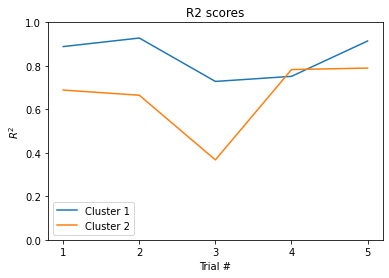

In [29]:
splits = range(1,6)
plt.plot(splits, scoreKM0,label='Cluster 1')
plt.plot(splits, scoreKM1,label='Cluster 2')
plt.title('R2 scores')
plt.xlabel('Trial #')
plt.xticks(splits)
plt.ylabel('$R^2$')
plt.ylim(0,1)
plt.legend(loc='best')
plt.show()

###  Hyperparameter Tuning Using Grid Search Cross-Validation


#### Cluster 0

Train-test-split

In [30]:
X = cluster0.drop(['median_price 2021 Q1'],axis=1)
y = cluster0['median_price 2021 Q1']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=123, test_size=.2)

In [31]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 51))}]


# step-3: perform grid search
# 3.1 specify model
lr = LinearRegression()
rfe = RFE(lr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [32]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130105,0.036042,0.005139,0.001475,1,{'n_features_to_select': 1},-0.101502,-0.018716,-0.022997,-0.035905,...,-0.032919,0.038115,49,0.051325,0.019840,0.020229,0.012086,0.068174,0.034331,0.021623
1,0.136667,0.042761,0.004259,0.000681,2,{'n_features_to_select': 2},-0.188882,-0.058214,0.001926,0.103208,...,-0.037297,0.094602,50,0.176289,0.107587,0.101458,0.054144,0.183656,0.124627,0.048884
2,0.077887,0.003616,0.003126,0.000590,3,{'n_features_to_select': 3},-0.220062,-0.115079,0.177638,0.314100,...,0.017049,0.197749,47,0.180316,0.297590,0.246134,0.188356,0.187586,0.219996,0.045453
3,0.140971,0.082658,0.004009,0.000580,4,{'n_features_to_select': 4},-0.185695,-0.114758,0.227381,0.323742,...,0.010885,0.220038,48,0.183590,0.297590,0.254869,0.211895,0.205978,0.230784,0.040602
4,0.072241,0.002029,0.003464,0.000198,5,{'n_features_to_select': 5},0.211687,0.311700,0.450658,0.537187,...,0.375407,0.112063,45,0.497798,0.490047,0.475327,0.438746,0.487053,0.477794,0.020818
5,0.100402,0.026002,0.002917,0.000372,6,{'n_features_to_select': 6},0.185375,0.314957,0.430479,0.537197,...,0.364729,0.117299,46,0.503160,0.490109,0.478515,0.440349,0.490123,0.480451,0.021515
6,0.095118,0.037879,0.003101,0.000557,7,{'n_features_to_select': 7},0.241792,0.225947,0.458778,0.615044,...,0.391223,0.144810,44,0.535517,0.545844,0.516430,0.460909,0.520265,0.515793,0.029410
7,0.114131,0.065942,0.003738,0.000634,8,{'n_features_to_select': 8},0.237262,0.324522,0.469994,0.615005,...,0.415237,0.128849,43,0.553871,0.569825,0.529487,0.703161,0.534574,0.578184,0.064115
8,0.134208,0.068959,0.003970,0.000634,9,{'n_features_to_select': 9},0.391821,0.280816,0.449179,0.733510,...,0.433822,0.161017,42,0.605126,0.571363,0.532852,0.777095,0.610702,0.619427,0.083601
9,0.066846,0.003325,0.003575,0.000593,10,{'n_features_to_select': 10},0.403934,0.237540,0.687414,0.751421,...,0.480568,0.203006,41,0.614535,0.597919,0.725046,0.781926,0.621837,0.668253,0.072297


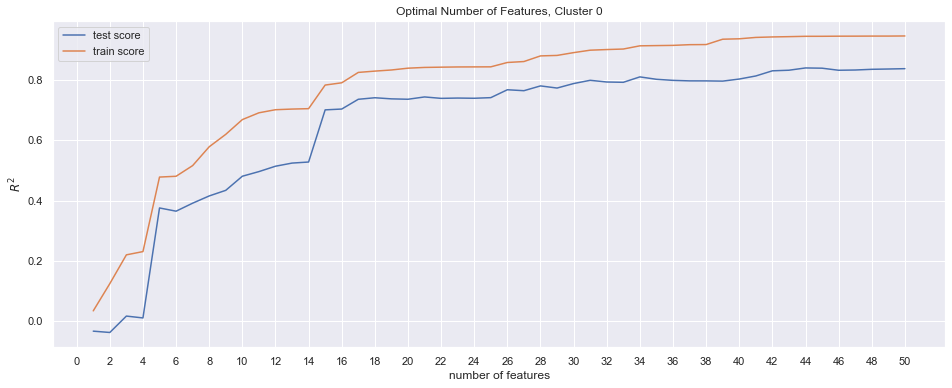

In [33]:
plt.figure(figsize=(16,6))
sns.set_theme()

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.xticks(range(0,51,2))
plt.ylabel('$R^2$')
plt.title("Optimal Number of Features, Cluster 0")
plt.legend(['test score', 'train score'], loc='upper left')

It appears that the optimal number of features on cluster 0 is at 42

In [34]:
n_features_optimal = 42

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)

# check r2 score
r2 = r2_score(y_test, y_pred)
print(f'Train R2 for linear regression on cluster 0: {r2_score(y_train,rfe.predict(X_train)).round(4)}') 
print(f'Test R2 for linear regression on cluster 0: {r2.round(4)}')

Train R2 for linear regression on cluster 0: 0.9346
Test R2 for linear regression on cluster 0: 0.8234


Cross-validated score

In [35]:
# Cluster 0
print('Cross-validated R2 score on cluster 0:')
cross_val_score(rfe, cluster0.drop(['median_price 2021 Q1'],axis=1), # X
                        cluster0['median_price 2021 Q1'],            # y 
                        cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean().round(4)

Cross-validated R2 score on cluster 0:


0.8272

#### Cluster 1

In [36]:
X = cluster1.drop(['median_price 2021 Q1'],axis=1)
y = cluster1['median_price 2021 Q1']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=100, test_size=.2)

In [37]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 51))}]


# step-3: perform grid search
# 3.1 specify model
lr = LinearRegression()
rfe = RFE(lr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.163253,0.087311,0.004553,0.000160,1,{'n_features_to_select': 1},0.218490,0.018400,-0.027045,0.000561,...,-0.000625,0.137406,50,0.104499,0.108961,0.150329,0.155682,0.160952,0.136085,0.024243
1,0.148403,0.020526,0.005137,0.000713,2,{'n_features_to_select': 2},0.267430,0.027150,-0.013467,-0.010982,...,0.012179,0.152049,48,0.188376,0.110855,0.236066,0.173933,0.248825,0.191611,0.049182
2,0.142970,0.038811,0.004637,0.000439,3,{'n_features_to_select': 3},0.358962,0.050245,-0.119435,-0.082021,...,0.009968,0.188048,49,0.238468,0.129756,0.323995,0.196350,0.313894,0.240493,0.072905
3,0.097587,0.003777,0.004412,0.000367,4,{'n_features_to_select': 4},0.361792,0.067530,-0.141805,0.107549,...,0.062750,0.175530,34,0.238564,0.138338,0.357178,0.269696,0.334244,0.267604,0.077488
4,0.101961,0.010572,0.004470,0.000194,5,{'n_features_to_select': 5},0.394894,-0.001572,-0.169029,0.162279,...,0.061086,0.199387,35,0.265165,0.176139,0.360259,0.305091,0.334245,0.288180,0.064321
5,0.122509,0.051508,0.004247,0.000568,6,{'n_features_to_select': 6},0.372292,0.061519,-0.186837,0.164455,...,0.026143,0.236526,47,0.300695,0.211275,0.361171,0.305738,0.376996,0.311175,0.058226
6,0.092945,0.002593,0.004652,0.000207,7,{'n_features_to_select': 7},0.373956,0.250105,-0.192857,0.154006,...,0.064049,0.250200,32,0.301808,0.269395,0.361790,0.338096,0.378055,0.329829,0.039631
7,0.108611,0.015818,0.005404,0.001293,8,{'n_features_to_select': 8},0.391673,0.239284,-0.139361,0.125169,...,0.064006,0.250329,33,0.311972,0.287849,0.370478,0.339525,0.381026,0.338170,0.034931
8,0.113599,0.018902,0.004367,0.000588,9,{'n_features_to_select': 9},0.385495,0.235187,-0.054383,0.145646,...,0.078507,0.244661,27,0.313019,0.288920,0.391388,0.348059,0.382541,0.344785,0.039340
9,0.111300,0.022066,0.004667,0.000580,10,{'n_features_to_select': 10},0.377449,0.230657,-0.015911,0.157565,...,0.085886,0.239365,25,0.314598,0.289054,0.398032,0.360441,0.382802,0.348985,0.041121


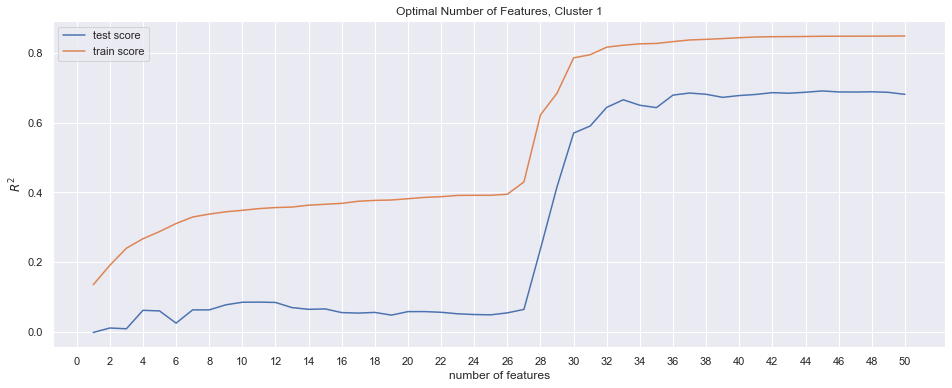

In [39]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('$R^2$')
plt.xticks(range(0,51,2))
plt.title("Optimal Number of Features, Cluster 1")
plt.legend(['test score', 'train score'], loc='upper left')

The optimal number of features in cluster 1 seems to be at 36.

In [40]:
n_features_optimal = 36

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)

# check r2 score
r2 = r2_score(y_test, y_pred)
print(f'Train R2 for linear regression on cluster 1: {r2_score(y_train,rfe.predict(X_train)).round(4)}') 
print(f'Test R2 for linear regression on cluster 1: {r2.round(4)}')

Train R2 for linear regression on cluster 1: 0.8226
Test R2 for linear regression on cluster 1: 0.6274


Cross-validated score

In [41]:
# Cluster 1
print('Cross-validated R2 score on cluster 1:')
cross_val_score(rfe, cluster1.drop(['median_price 2021 Q1'],axis=1), # X
                        cluster1['median_price 2021 Q1'],            # y 
                        cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean().round(4)

Cross-validated R2 score on cluster 1:


0.6397

### Conclusion

# Classification

Aside from predicting the house price, we're curious to see if we can predict the postcodes that will grow more than 5% on the following quarter

In [42]:
# Read Data
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Transformed.csv",
                     index_col="postcode")

In [43]:
# Remove interest rate, bond yields (they're the same for all postcodes)
modelDF = modelDF.iloc[:, np.r_[0:30, [48], 96:121]] # this is for keeping trans-variables
# modelDF = modelDF.iloc[:, np.r_[0:56]] # this is for keeping original variables

# Drop mean price columns
modelDF = modelDF.drop(["mean_price 2020 Q1", "mean_price 2020 Q2", "mean_price 2020 Q3",
                        "mean_price 2020 Q4", "mean_price 2021 Q1"],axis=1)

# Drop one category from each feature group
modelDF = modelDF.drop(columns=['INCP_NEG_NIL_Prop', 
                                 '65+yo_Prop',
                                 'CPRF_na_Prop',
                                 'citizen_AU_Prop'],axis=1)

print(modelDF.shape)
pd.set_option('display.max_columns', None)
modelDF.head(1)

(573, 47)


,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,median_rent_newb 2020 Q1,median_rent_newb 2020 Q2,median_rent_newb 2020 Q3,median_rent_newb 2020 Q4,median_rent_newb 2021 Q1,new_bonds_no 2020 Q1,new_bonds_no 2020 Q2,new_bonds_no 2020 Q3,new_bonds_no 2020 Q4,new_bonds_no 2021 Q1,sales_no 2020 Q1,sales_no 2020 Q2,sales_no 2020 Q3,sales_no 2020 Q4,sales_no 2021 Q1,total_bonds_no 2020 Q1,total_bonds_no 2020 Q2,total_bonds_no 2020 Q3,total_bonds_no 2020 Q4,total_bonds_no 2021 Q1,population_2016,INCP_LOW_Prop,INCP_MID_Prop,INCP_HIGH_Prop,CPRF_2_Prop,CPRF_3_Prop,CPRF_4_Prop,CPRF_5_Prop,CPRF_6+_Prop,CPRF_HHOLD_NO_Prop,0-4yo_Prop,5-14yo_Prop,15-24yo_Prop,25-34yo_Prop,35-54yo_Prop,55-64yo_Prop,citizen_non_AU_Prop,YARRP <1975_Prop,YARRP 1976-1995_Prop,YARRP 1996-2005_Prop,YARRP 2006-2016_Prop,ATSI_Prop
postcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,1225.0,1000.0,1390.0,1110.0,1371.0,700.0,630.0,600.0,550.0,600.0,1230.0,931.0,1809.0,1705.0,1469.0,105.0,74.0,100.0,155.0,184.0,8615.0,7595.0,8069.0,9140.0,9327.0,27411.0,0.339535,0.194046,0.143337,0.125971,0.031265,0.012915,0.00197,0.000766,0.469191,0.025464,0.020138,0.212725,0.389479,0.229762,0.060924,0.534895,0.019153,0.058006,0.079348,0.475101,0.001934


## Assign class label - define 'high growth potential' areas

Calculate growth rate of median house price for each quarter to draw the line of high/low growth potential.

In [44]:
# Growth rate Q1-Q2 2020
modelDF['gr_20Q2'] = ((modelDF['median_price 2020 Q2']/modelDF['median_price 2020 Q1'])-1)*100

# Growth rate Q2-Q3 2020
modelDF['gr_20Q3'] = ((modelDF['median_price 2020 Q3']/modelDF['median_price 2020 Q2'])-1)*100

# Growth rate Q3-Q4 2020
modelDF['gr_20Q4'] = ((modelDF['median_price 2020 Q4']/modelDF['median_price 2020 Q3'])-1)*100

# Growth rate Q4 2020 - Q1 2020
modelDF['gr_21Q1'] = ((modelDF['median_price 2021 Q1']/modelDF['median_price 2020 Q4'])-1)*100

# Annual growth rate Q1 2020 - Q1 2021
modelDF['gr_annual'] = ((modelDF['median_price 2021 Q1']/modelDF['median_price 2020 Q1'])-1)*100

modelDF.iloc[:,47:52].describe().round(2)

,gr_20Q2,gr_20Q3,gr_20Q4,gr_21Q1,gr_annual
count,573.00,573.00,573.00,573.00,573.00
mean,2.85,2.08,6.22,6.81,9.18
std,25.27,31.87,36.38,39.58,30.91
min,-76.17,-82.76,-86.19,-82.40,-81.70
25%,-3.62,-2.88,-0.38,0.00,4.17
50%,2.84,-0.14,1.24,3.75,7.87
75%,3.72,5.44,7.83,10.01,16.92
max,373.48,435.31,486.40,660.50,300.71


As we can see from the above summary table, the range of house price changes is fairly large. In certain area, the median price increased 6 folds in Q1 2021. However, it would be irrational to only consider such dramatic increase as 'high growth'. 

The **mean** and **50% (median)** of growth rates would give us a better idea of the general trends in the market - we could see the growth started to accelerate in Q4 last year and continued to hold strong in 2021 with an average of **6.81%** and a median of **3.75%**. And due to the extreme cases on the higher ends, average is always more 'inflated' than median for all four time periods.

Hence, we'd like to set the threshold **between the mean and median growth rate of the last known period (Q1 2021) at 5%**, classify postcodes whose median price increasing by greater than or equal 5% as **'high growth'** and those less than 5% as 'low growth' areas, and build a classifier to predict the growth potential (binary class) of each postcode in the future time period.

We will create a class variable `high_growth`, and assign label 1 or 0 to each row based on the previously calculated `gr_21Q1` according to above stated rule.

In [45]:
# Create class variable and assign class label
modelDF['high_growth'] = np.where(modelDF.gr_21Q1 >= 5,'1','0')

print('Percentage of high growth and low growth areas:')
pd.DataFrame(modelDF['high_growth'].value_counts(normalize=True).round(3)*100)

Percentage of high growth and low growth areas:


,high_growth
0,59.0
1,41.0


In our book, 41% of postal areas are considered 'high growth' areas and 59% 'low growth' areas. 

This **59%** is considered our **'chance accuracy'**, i.e., without learning, our model would simply classify all cases into 'low growth', the majority class, and have an accuracy of 59%, which will serve as the baseline for the classifiers we buil in later sections. Ideally, we should expect greater accuracy than 59% (the greater the better!) from our trained models.

## Random Forest Classifier

###  Base model

Use __Random Forect Classifier__ and train_test_split to check the accuracy score for predicting if a postcode grew more than the mean growth rate.

In [57]:
# Train-test split
X = modelDF.drop(['median_price 2021 Q1', 'high_growth','gr_annual','gr_21Q1'],axis=1)
y = modelDF['high_growth']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=123, test_size=.2, 
                                                    stratify = modelDF['high_growth'])

In [58]:
# Model with Random Forest
rfc = RandomForestClassifier(random_state=123)
rfc.fit(X_train,y_train)
ypredRFC = rfc.predict(X_test)

In [59]:
# Get model diagnostics
print('Accuracy score on test data:',accuracy_score(ypredRFC, y_test).round(4)*100,'%') #Accuracy

cm_rf1 = confusion_matrix(y_test, ypredRFC)
rec_rf1 = 100*cm_rf1[1][1] / (cm_rf1[1][1] + cm_rf1[1][0])
prec_rf1 = 100*cm_rf1[1][1] / (cm_rf1[1][1] + cm_rf1[0][1])

print('Recall of the default random forest classifier: %.2f' % rec_rf1,'%')
print('Precision of the default random forest classifier: %.2f' % prec_rf1,'%')

Accuracy score on test data: 68.7 %
Recall of the default random forest classifier: 65.96 %
Precision of the default random forest classifier: 60.78 %


### Cross-validation

Use cross-validation to test the data thoroughly

In [60]:
rfc = RandomForestClassifier(random_state=123)
scoreRFC = cross_val_score(rfc, X, y, scoring='accuracy',
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123))

print('Using cross-validation\nAverage accuracy is:',scoreRFC.mean().round(4)*100,'%')
print('STDEV:',scoreRFC.std().round(4))

Using cross-validation
Average accuracy is: 68.94 %
STDEV: 0.0225


In [61]:
y_pred_cv = cross_val_predict(rfc, X, y, 
                              cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123))

cm_rf2 = confusion_matrix(y, y_pred_cv)
rec_rf2 = 100*cm_rf2[1][1] / (cm_rf2[1][1] + cm_rf2[1][0])
prec_rf2 = 100*cm_rf2[1][1] / (cm_rf2[1][1] + cm_rf2[0][1])

print('Recall of the random forest classifier (validated): %.2f' % rec_rf2,'%')
print('Precision of the random forest classifier (validated): %.2f' % prec_rf2,'%')

Recall of the random forest classifier (validated): 63.83 %
Precision of the random forest classifier (validated): 61.73 %


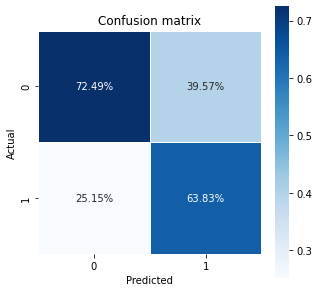

In [11]:
# Plot Confusion Matrix
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_rf2/cm_rf2.astype(float).sum(axis=1), 
                 annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

### Hyperparameter tuning

Set up the parameters to tune

In [62]:
parameters = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,None],
    'criterion' :['gini', 'entropy']
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv=folds, n_jobs=-1)
CV_rfc.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

See which are the best parameters

In [63]:
# Refit model with the selected best parameters

print(CV_rfc.best_params_)
rfc_best = RandomForestClassifier(random_state=123)
rfc_best.set_params(**CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 100}


RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       random_state=123)

In [64]:
# Get Accuracy score

scoreRFC2 = cross_val_score(rfc_best, X, y,
                           scoring='accuracy',
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123))

print('Using cross-validation\nTuned average accuracy is:',scoreRFC2.mean().round(4)*100,'%')
print('STDEV:',scoreRFC.std().round(4))

Using cross-validation
Tuned average accuracy is: 70.86 %
STDEV: 0.0225


In [65]:
y_pred = cross_val_predict(rfc_best, X, y, 
                              cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123))

cm_rf3 = confusion_matrix(y, y_pred)
rec_rf3 = 100*cm_rf3[1][1] / (cm_rf3[1][1] + cm_rf3[1][0])
prec_rf3 = 100*cm_rf3[1][1] / (cm_rf3[1][1] + cm_rf3[0][1])

print('Recall of the tuned random forest classifier: %.2f' % rec_rf3,'%')
print('Precision of the tuned random forest classifier: %.2f' % prec_rf3,'%')

Recall of the tuned random forest classifier: 67.23 %
Precision of the tuned random forest classifier: 63.71 %


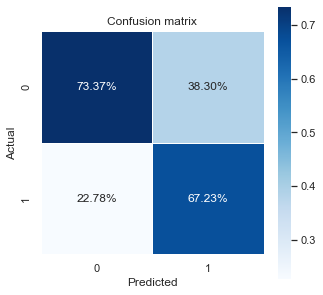

In [66]:
# Plot Confusion Matrix
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_rf3/cm_rf3.astype(float).sum(axis=1), 
                 annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

Store RFC predictions

In [75]:
rfc_best_ypred = rfc_best.predict(X)

### Conclusion

The cross-validation score result from the tuned random forest classifier model performs slightly better compared to the default model.

## Multi-layer Perceptron Classifier

Based on neural network, the MLP Classifier is another great candidate for discovering existing patterns in data and extrapolating them, although it's sometimes considered most useful when input variables are categorical. Regardless, we are keen to try it on our numeric inputs and see how it compares with the random forest classifier.

### Base model

First build a baseline MPLClassifier using default parameters.

In [46]:
# Specify features and the target
X = modelDF.drop(['high_growth', 'median_price 2021 Q1', 
                  'gr_annual','gr_21Q1'], axis=1)
y = modelDF['high_growth']

# Split the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123,
                                                   stratify = modelDF['high_growth'])

In [47]:
# Training the MLPClassifier with the default parameters (random_state=42)
mlpc = MLPClassifier(random_state=44)
mlpc.fit(X_train, y_train)

# Output the accuracy on training data and test data respectively
y_pred_train = mlpc.predict(X_train)
y_pred_test = mlpc.predict(X_test)

acc_train = 100*accuracy_score(y_train, y_pred_train)
acc_test = 100*accuracy_score(y_test, y_pred_test)

print('Train Accuracy for the default MLP classifier: %.2f' % acc_train,'%')
print('Test Accuracy for the default MLP classifier: %.2f' % acc_test,'%')

Train Accuracy for the default MLP classifier: 68.78 %
Test Accuracy for the default MLP classifier: 60.87 %


In [48]:
# Output the confusion matrix on test data

cm_mlp1 = confusion_matrix(y_test, y_pred_test)
rec_mlp1 = 100*cm_mlp1[1][1] / (cm_mlp1[1][1] + cm_mlp1[1][0])
prec_mlp1 = 100*cm_mlp1[1][1] / (cm_mlp1[1][1] + cm_mlp1[0][1])

print('Recall of the default MLP classifier: %.2f' % rec_mlp1,'%')
print('Precision of the default MLP classifier: %.2f' % prec_mlp1,'%')

Recall of the default MLP classifier: 87.23 %
Precision of the default MLP classifier: 51.25 %


The good news is that the test accuracy (**68.78%**) of the baseline MLP classifier is greater than 59%, the chance accuracy without tuning, however we observe a gap in train/test accuracy, suggesting potential overfitting - something to bear in mind in later validation and tuning.

Recall seems to be quite high (**87.23%**), which is likely to be due to the random seed. We will rule this out using cross-validation.

In [49]:
# Explore the learned MLP model
print(mlpc)
print('\n# of layers (including the input layer): %.f' % mlpc.n_layers_)
print('MLP structure: %.f X %.f X %.f' % (X.shape[1], 
                                          mlpc.get_params()['hidden_layer_sizes'][0], 
                                          mlpc.n_outputs_))

MLPClassifier(random_state=44)

# of layers (including the input layer): 3
MLP structure: 49 X 100 X 1


Our current model has 1 hidden layer, 100 units per hidden layer - in later tuning, we might experiment with less number of hidden layers and/or less number of perceptrons per layer, and see if a simpler model will have more consistent performance.

#### Cross Validation
Use 10-fold cross validation to report a more robust testing performance.

In [50]:
# Use 10-fold cross validation to validate the model
scores_mlp_default = cross_val_score(mlpc, X, y, 
                                     cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))

print('Accuracy range for the default MLP classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores_mlp_default.min(), 
         scores_mlp_default.max(), 
         scores_mlp_default.mean(), 
         scores_mlp_default.std()))

Accuracy range for the default MLP classifier: [0.5517, 0.7544]; mean: 0.6511; std: 0.0521



In [51]:
# Check confusion matrix
y_pred_2 = cross_val_predict(mlpc, X, y,
                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))

cm_mlp2 = confusion_matrix(y, y_pred_2)
rec_mlp2 = 100*cm_mlp2[1][1] / (cm_mlp2[1][1] + cm_mlp2[1][0])
prec_mlp2 = 100*cm_mlp2[1][1] / (cm_mlp2[1][1] + cm_mlp2[0][1])

print('Recall of the default MLP classifier (validated): %.2f' % rec_mlp2,'%')
print('Precision of the default MLP classifier (validated): %.2f' % prec_mlp2,'%')

Recall of the default MLP classifier (validated): 66.81 %
Precision of the default MLP classifier (validated): 56.27 %


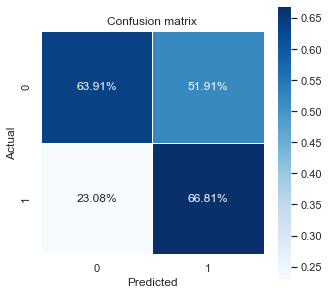

In [52]:
# Plot Confusion Matrix
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_mlp2/cm_mlp2.astype(float).sum(axis=1), 
                 annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

It turns out that our concern for the low recall might have been a false alarm! 

The 5-fold cross validation shows that our default model has an avarage accuracy of **65.11%**, still higher than the chance accuracy of 59%, **66.81%** correct recall and **56.27%** precision, while producing a correct True Negative (TN) rate of 63.91%. That's certainly not a bad baseline model to start with. But can we make it better?

### Hyperparameter tuning

We will be using two different tuning method and explore which yields a better model: 
1. Tune each parameter <u>individually</u>, build a final classifier with the optimal value of each individual parameter found;
2. Use `GridSearchCV` to find the optimal combination of parameters of all.

#### Tuning Individual Parameter

**<u>a. Number of hidden units</u>**

The default number of hidden units is 100. With 49 input units and 2 output classes, our default model has (49+1)x100 + (100+1)x2 = **5202** model parameters (weights), which is relatively large compared to our sample size (n=573). This may impact the consistency of our model and create potential issue of overfitting.

Here're going to test a range of numbers of hidden units, moving in both direction from 100, and use 10-fold cross validation to report on the testing accuracy. 

In [26]:
# For each number of hidden units, we use 10-fold cross validation to report the testing accuracy.
cv_scores = []
cv_scores_std = []

hidden_units_no = [[10],[25],[50],[75],[100],[125],[150]]

for i in hidden_units_no:
    mlpc = MLPClassifier(hidden_layer_sizes=i, random_state=44)
    scores = cross_val_score(mlpc, X, y, scoring='accuracy', 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

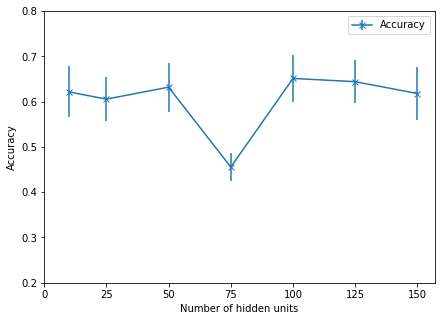

In [27]:
# Plot accuracy against the number of hidden units
plt.figure(figsize=(7,5))
plt.errorbar(hidden_units_no, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')

plt.xlabel('Number of hidden units')
plt.xticks(np.arange(0, 151, 25))

plt.ylabel('Accuracy')
plt.ylim(0.2, 0.8)

plt.legend(loc='best')
plt.show()

In [28]:
# Find the optimal number of hidden units
tuned_score = max(cv_scores)
max_index = cv_scores.index(tuned_score)
tuned_hlsizes = hidden_units_no[max_index][0]

print("Best accuracy score: %.4f" % tuned_score)
print("Optimal number of hidden units:", tuned_hlsizes)

Best accuracy score: 0.6511
Optimal number of hidden units: 100


Our hypothesis proves to be wrong - the optimal number of hidden units turns out to be precisely 100, the default setting. On a another note, it's interesting to see a sharp dip at 75, migh as well take a look at what's going on between 50-100.

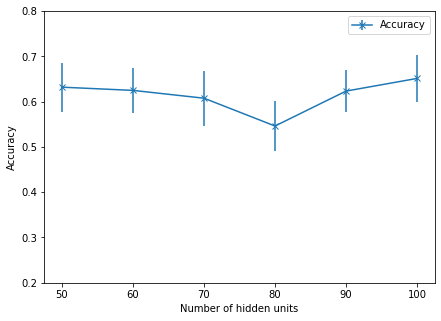

In [29]:
# Check and plot accuracy with hidden units range from 50 to 100
cv_scores = []
cv_scores_std = []

hidden_units_no = [[50],[60],[70],[80],[90],[100]]

for i in hidden_units_no:
    mlpc = MLPClassifier(hidden_layer_sizes=i, random_state=44)
    scores = cross_val_score(mlpc, X, y, scoring='accuracy', 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot accuracy against the number of hidden units
plt.figure(figsize=(7,5))
plt.errorbar(hidden_units_no, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')

plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.ylim(0.2, 0.8)
plt.legend(loc='best')
plt.show()

Once we break down the range into smaller intervals, we could see a gradual decline in accuracy as the hidden layer size increases from 50 to 80, after which it picked up again and peaked at 100.

----

**<u>b. Number of hidden layers</u>**

Since we suspected the complexity of the model would cause overfitting, we're dubious that adding the number of hidden layers would improve accuracy. So here we're only going to try 2 hidden layers and go back to our simple 1-layer model if there's no significant improvement.

In [30]:
# Try a MLP model with two hidden layers, 100 units each (default)
mplc = MLPClassifier (hidden_layer_sizes=[100,100], random_state=44)

scores = cross_val_score(mlpc, X, y, scoring='accuracy', 
                         cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123), 
                         verbose=1)   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [31]:
print('Accuracy for the 2-layer MLP classifier: mean: %.4f; std: %.4f'
      % (scores.mean(), 
         scores.std()))

Accuracy for the 2-layer MLP classifier: mean: 0.6511; std: 0.0521


Recall that the average accuracy for the default MLP classifier with 1 hidden layer of 100 units is exactly the **65.11%**, with the same std of 0.0521. It seems though adding 1 more layer doesn't give us edge at all. Hence we will **just stick to 1 hidden layer**.

----

**<u>c. Choose the solver</u>**

Test which solver (`lbfgs`,`sgd`, `adam`) performs the best with our data.

In [32]:
# Try different solvers - lbfgs can't converge?
cv_scores = []
cv_scores_std = []
solvers = ['lbfgs','sgd', 'adam']
for i in solvers:
    mlpc = MLPClassifier(solver=i, random_state=44)
    scores = cross_val_score(mlpc, X, y, scoring='accuracy', 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_

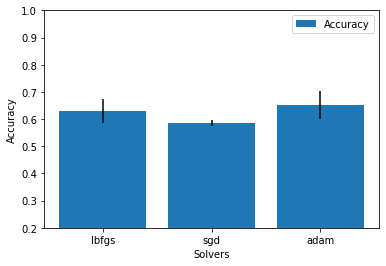

In [33]:
# Plot the relationship
plt.bar(solvers, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Solvers')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend(loc='best')
plt.show()

In [34]:
# Define the optimal solver for later use
tuned_score = max(cv_scores)
tuned_solver = (solvers[cv_scores.index(tuned_score)])

print("Best accuracy score: %.4f" % tuned_score)
print("Best solver:", tuned_solver)

Best accuracy score: 0.6511
Best solver: adam


It is obvious that `adam`, the default solver, outperforms lbfgs and sgd and will be the preferred solver to bring along to the final model

----

**<u>d. Choose the activation Function</u>**

Activation function also plays a critical role in neural-network-based classifier, and we have a list to shop from: `identity`,`logistic`, `tanh` and `relu`, whic is the default.

In [35]:
# Try different activation functions
cv_scores = []
cv_scores_std = []
activations = ['identity','logistic','tanh','relu']

for a in activations:
    mlpc = MLPClassifier(activation=a, random_state=44)
    scores = cross_val_score(mlpc, X, y, scoring='accuracy', 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

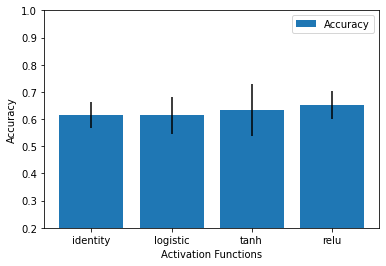

In [36]:
# Plot accuracy against activation fuction
plt.bar(activations, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Activation Functions')
plt.ylim([0.2, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [37]:
# Define the optimal activation function for later use
tuned_score = max(cv_scores)
tuned_act = (activations[cv_scores.index(tuned_score)])

print("Best accuracy score: %.4f" % tuned_score)
print("Best activatioin function:", tuned_act)

Best accuracy score: 0.6511
Best activatioin function: relu


The morale of the story so far is that simple is best - `relu`, the default activation function also outperforms all three alternatives and will be the favourable. 

----

**<u>e. L2 Regularisation</u>**

Alpha is the parameter for regularisation term, which penalises the number of weights as it increases and thereby deals with overfitting. The greater the alpha value, the heavier the penalty We'll be testing a range of alpha (0.0001,0.001,0.01, 0.1,1) and see if any provides improvement.

In [38]:
# Try different regularisation parameters
cv_scores = []
cv_scores_std = []
alphas = [0.0001,0.001,0.01, 0.1, 1]
for i in alphas:
    mplc = MLPClassifier(alpha=i,random_state=44)
    scores = cross_val_score(mplc, X, y, scoring='accuracy', 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

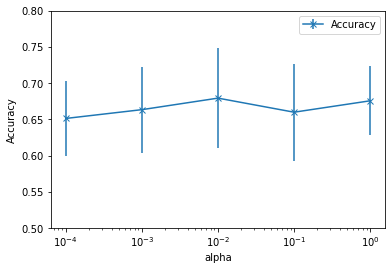

In [39]:
# Plot accuracy against alpha values
plt.errorbar(alphas, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylim([0.5, 0.8])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [40]:
# Define the optimal alpha for later use
tuned_score = max(cv_scores)
tuned_alpha = (alphas[cv_scores.index(tuned_score)])

print("Best accuracy score: %.4f" % tuned_score)
print("Best alpha value:", tuned_alpha)

Best accuracy score: 0.6792
Best alpha value: 0.01


The average accuracy peaked when **alpha=0.01**, a heavier complexity penalty than the default setting.

----

**<u>f. Number of iterations</u>**

In [41]:
# Try different number of iterations
cv_scores = []
cv_scores_std = []
iterations = [100, 200, 400, 600]
for i in iterations:
    mlpc = MLPClassifier(max_iter=i, random_state=44)
    scores = cross_val_score(mlpc, X, y, scoring='accuracy', 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

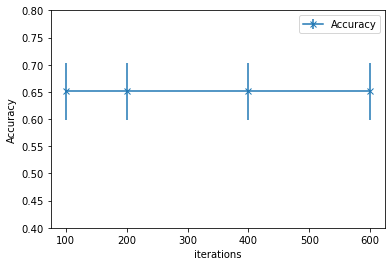

In [42]:
# Plot the relationship
plt.errorbar(iterations, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.ylim(0.4,0.8)
plt.legend(loc='best')
plt.show()

The number of iterations do not seem to improve the model, however we've encoutered the problem where max iteration is reached but the model hasn't converged yet. Hence in the final model, we may want to bump up max iteration a bit just to help the model converge to the optimised result.

#### Tuning with GridSearch

There are limitations to individual parameter tuning - the single best parameter in each experiment doesn't necessarily work well in conjoint. Hence, we use the `GridSearchCV` to search the best combinations out of all possible ones specified in the parameter grid.

In [43]:
# Define the GridSearchCV object 
mlp = MLPClassifier(random_state=123)

parameters = { 
    'hidden_layer_sizes': [[10],[25],[50],[75],[100],[150]],
    'solver': ['sgd', 'adam'],
    'activation':['identity','logistic','tanh','relu'],
    'alpha' : [0.0001,0.01,0.1,1],
    'max_iter' :[100, 200, 400]
}

# Reduce folds to 5 for faster computation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=123) 

gs_mlp = GridSearchCV(estimator=mlp, param_grid=parameters, cv=folds, n_jobs=-1)

In [44]:
# Fit the data to GS

gs_mlp.fit(X,y)

/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=MLPClassifier(random_state=123), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [[10], [25], [50], [75], [100],
                                                [150]],
                         'max_iter': [100, 200, 400],
                         'solver': ['sgd', 'adam']})

In [45]:
# Retrieve the best parameters

print(gs_mlp.best_params_)

gs_act = gs_mlp.best_params_['activation']
gs_alpha = gs_mlp.best_params_['alpha']
gs_hlsizes = gs_mlp.best_params_['hidden_layer_sizes']
gs_solver = gs_mlp.best_params_['solver']
gs_iter = gs_mlp.best_params_['max_iter']

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': [150], 'max_iter': 100, 'solver': 'adam'}


Our grid search suggests that we keep alpha and solver as their default: 0.0001 and adam, while updating below parameters to:

* Activation function: Logistics
* Number of hidden units: 150
* Maximum iteration: 100

We notice that they look quite different to the outcome of the individual tuning, which recommended relu as activation function and 100 as size of hidden layers. It's also interesting that we should also lower max iteration, which might stop the algorithm earlier before convergence. This can be a way to combat overfitting.

We're curious to see how the two 'best' models perform and which is the ultimate winner. 

### Best MLPClassifier

#### Best MLPClassifier - based on individual tuning

First, buid an MLPClassier with optimal parameters based on individual tuning.

In [46]:
# Best MLP classifier based on individual tuning

mlp_best1 = MLPClassifier(hidden_layer_sizes=[tuned_hlsizes],
                          solver=tuned_solver,
                          activation=tuned_act,
                          alpha=tuned_alpha,
                          random_state=44, 
                          max_iter=500) #increase max_iter to 500 for convergence

scores_mlp_best1 = cross_val_score(mlp_best1, X, y, 
                                  cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123), 
                                  verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [52]:
# Output accuracy, recall and precision

print("Accuracy for the individually-tuned  MLP classifier:", "{:.4f}".format(scores_mlp_best1.mean()), 
      "STD:", "{:.4f}".format(scores_mlp_best1.std()))


y_pred_3 = cross_val_predict(mlp_best1, X, y,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123))

cm_mlp3 = confusion_matrix(y, y_pred_3)
rec_mlp3 = 100*cm_mlp3[1][1] / (cm_mlp3[1][1] + cm_mlp3[1][0])
prec_mlp3 = 100*cm_mlp3[1][1] / (cm_mlp3[1][1] + cm_mlp3[0][1])

print('Recall of the individually-tuned  MLP classifier: %.2f' % rec_mlp3,'%')
print('Precision of the individually-tuned MLP classifier: %.2f' % prec_mlp3,'%')

Accuracy for the individually-tuned  MLP classifier: 0.6792 STD: 0.0694
Recall of the individually-tuned  MLP classifier: 69.79 %
Precision of the individually-tuned MLP classifier: 57.54 %


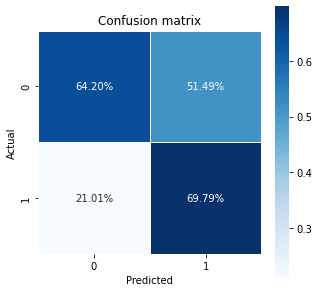

In [53]:
# Plot Confusion Matrix

plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_mlp3/cm_mlp3.astype(float).sum(axis=1), 
                 annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

The overall accuracy for the individually tuned classifier is **67.92%**, slight improvement compared to our default model (65.11%). The improvement mainly comes from better recall, from 66.81% to **69.79%**, while TN rate basically remained steady (64.20% vs. default 63.91%).

#### Best MLPClassifier - based on GridSearch

Next build an MLP classifier with optimal parameters based on GridSearch.

In [57]:
# Best MLP classifier based on GS

mlp_best2 = MLPClassifier(hidden_layer_sizes=gs_hlsizes,
                         solver=gs_solver,
                         activation=gs_act,
                         alpha=gs_alpha,
                         max_iter=gs_iter,
                         random_state=44)
scores_mlp_best2 = cross_val_score(mlp_best2, X, y, 
                                  cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123), 
                                  verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached

We acknowledge that our model may not fully converge because we purposely set a very low max iteration of 100 to limit overfitting.

In [58]:
print("Accuracy for the GS-tuned MLP:", "{:.4f}".format(scores_mlp_best2.mean()), 
      "STD:", "{:.4f}".format(scores_mlp_best2.std()))

y_pred_4 = cross_val_predict(mlp_best2, X, y,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123))

cm_mlp4 = confusion_matrix(y, y_pred_4)
rec_mlp4 = 100*cm_mlp4[1][1] / (cm_mlp4[1][1] + cm_mlp4[1][0])
prec_mlp4 = 100*cm_mlp4[1][1] / (cm_mlp4[1][1] + cm_mlp4[0][1])

print('Recall of the GS-tuned MLP classifier: %.2f' % rec_mlp4,'%')
print('Precision of the GS-tuned MLP classifier: %.2f' % prec_mlp4,'%')

Accuracy for the GS-tuned MLP: 0.6510 STD: 0.0651


/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Recall of the GS-tuned MLP classifier: 62.98 %
Precision of the GS-tuned MLP classifier: 55.85 %


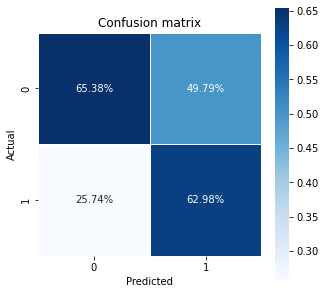

In [59]:
# Plot Confusion Matrix
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_mlp4/cm_mlp4.astype(float).sum(axis=1), 
                 annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

The overall accuracy for the GS-tuned classifier is **65.10%**, which actually represented no improvement versus the default model (accuracy 65.11%). TN rate did increase from 63.91% to **65.38%**, however at the cost of a lower recall (dropped form 66.81% to **62.98%**).

The result certainly raises some questions about the grid search method, but for now we'll just take the individually tuned model as the best MLP classifier and compare it against the random forest classifier we built earlier.

## The Classifier of Choice

Now it's time to compare the tuned Random Forest classifier and the tuned MLP classifier and determine the ultimate best for the task of classifying high-growth areas.

In [66]:
# Summarise the performance of both models 

rfc_acc = scoreRFC2.mean()
rfc_std = scoreRFC2.std()
rfc_summary = [rfc_acc, rfc_std, rec_rf3/100, prec_rf3/100]

mlp_acc = scores_mlp_best1.mean()
mlp_std = scores_mlp_best1.std()
mlp_summary = [mlp_acc, mlp_std, rec_mlp3/100, prec_mlp3/100]

summary = {'RF Classifier': rfc_summary,
           'MLP Classifier': mlp_summary}

summary_df = pd.DataFrame(summary, index=['Mean accuracy','Std','Recall','Precision'])
summary_df.round(4)

,RF Classifier,MLP Classifier
Mean accuracy,0.7086,0.6792
Std,0.0202,0.0694
Recall,0.6723,0.6979
Precision,0.6371,0.5754


It's clear from above summary the RF classifier outperforms the MLP classifier on all fronts but recall, which is the metrics we are most interested in. Regardless we would still **prefer the RF classifier** due to its greater consistency (smaller std) and its more even performance in predicting both high-growth and low-growth areas. 

## Analysis and Interpretation

The additional feature of **relative importance** that random forest has to offer is another reason why it's preferred over MLP. The relative importance scores will give us an idea of which features are more of a driving force of the house price growth in each postal area.

In [78]:
# Obtain relative importance
imp = rfc_best.feature_importances_

# Pair relative importance scores with feature names
imp_lst = imp.tolist()
feature_lst = list(X_train.columns)

# Display in a dataframe
importance = pd.DataFrame(list(zip(feature_lst, imp_lst)),
                          columns =['Feature', 'Relative Importance'])
importance = importance.set_index('Feature')

# Sort relative importance in descending order
importance = importance.sort_values(by='Relative Importance', ascending=False)

# Show top 10 features
importance.head(10).round(4)

,Relative Importance
Feature,
sales_no 2020 Q4,0.1022
gr_20Q4,0.0945
population_2016,0.0701
median_price 2020 Q4,0.0395
total_bonds_no 2020 Q4,0.0394
YARRP 1996-2005_Prop,0.0332
total_bonds_no 2020 Q3,0.0295
citizen_non_AU_Prop,0.0277
YARRP 2006-2016_Prop,0.0230


We have some very interesting obversations here:

**1. The previous quarter stats are the best predictors** 
<br>4 out of the top 5 features in predicting growth are information about Q4 2020, which is the precedent time period of Q1 2021. Amont these four, number of sales made in Q4 came to the top, followed the price growth from one more quarter back (Q3 2020), which all makes intuitive sense - this probably is the intuitive definition of 'a hot suburb'.</br> 

**2. Rental market is an indicator**
<br>Out of the top 10 features, the total numbers of bonds hold came up 3 times, that of current time period (Q1 2021) and two precedent time periods (Q3/Q4 2020). This may sounds counter intuitive - you would assume that the more people who rent in an area, the less people who would buy in that area. A prime example would be Sydney's famous Surry Hills suburb, buzzing with young professionals living in rental houses, enjoying the close proximity to the city. Yet Surry Hills is one of the most expensive inner city suburb to buy properties. </br>

**3. Follow the immigrants**
<br>On the list, we also see three features vaguely related to immigration: YARRP 1996-2005%, Non-AU citizen% and YARRP 2006-2016% (YARRP stands for year of arriving in Australia). The general idea is that the greater proportion of recent immigrants (who moved to Australia in the last 25 years) and of non-Australian citizens in an area, the more likely that area is going to rise in property prices - we know they come with money!</br>

Now here comes our final question - all in all, **where these high growth areas are?** Let's visualise them on the map

In [77]:
# Get Class Labels
modelDF['rfc_best_ypred'] = rfc_best_ypred
df_rfc = modelDF['rfc_best_ypred']

# Merge labels to map data
map_rfc = pd.merge(nsw, df_rfc, on='postcode')

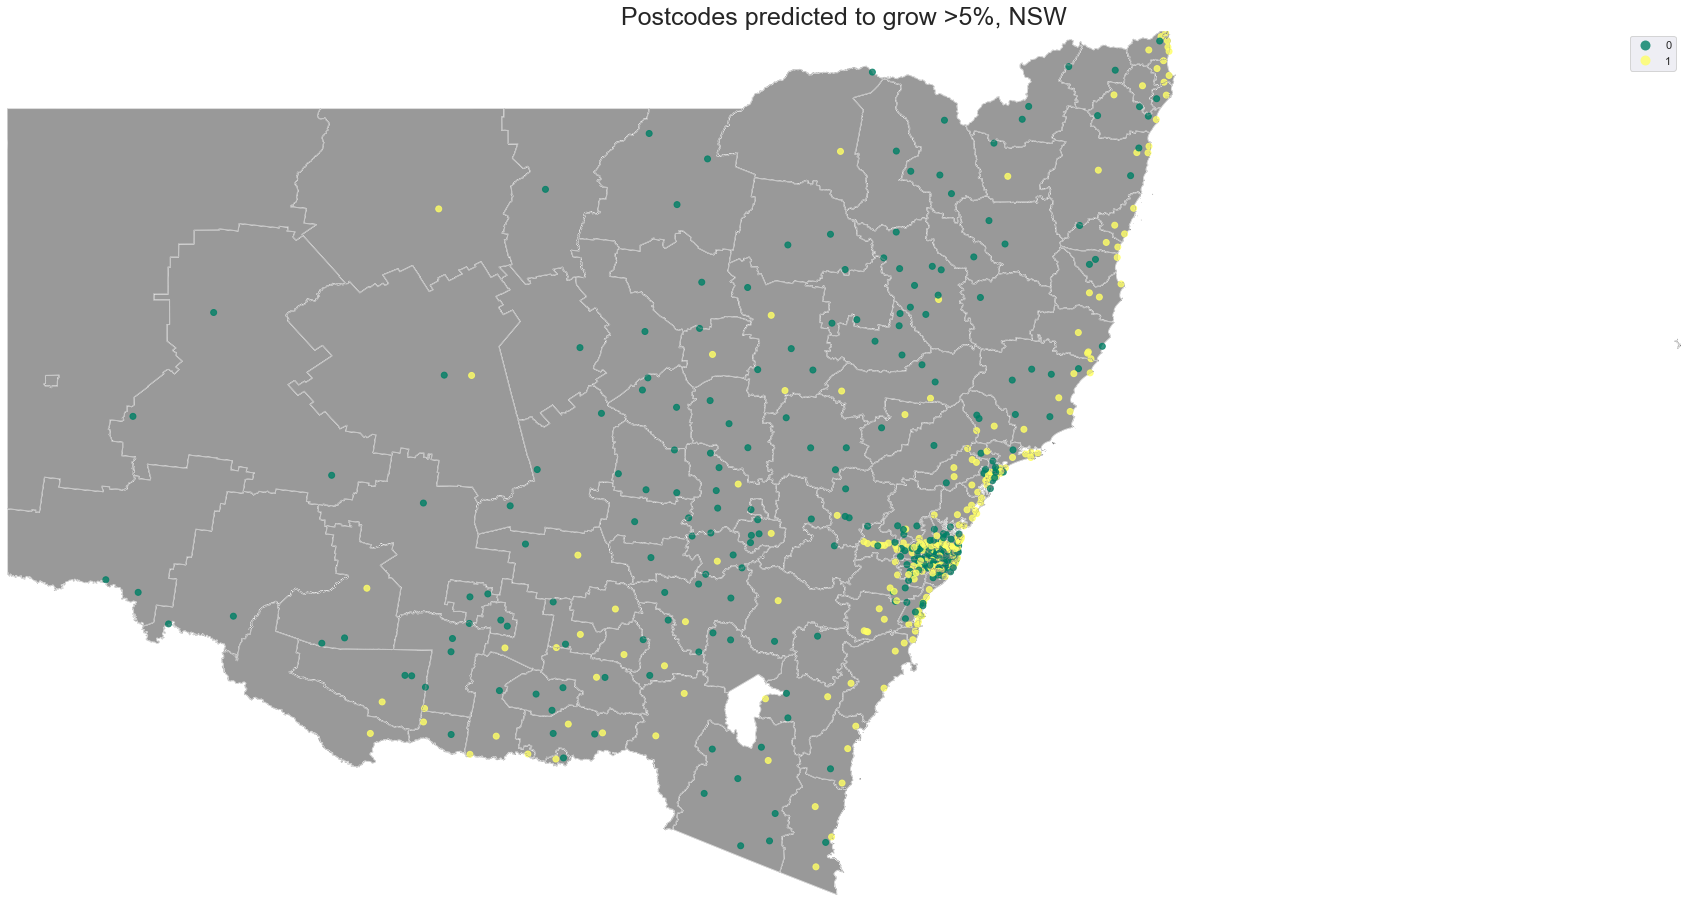

In [81]:
fig, ax = plt.subplots(1,1, figsize=(30,30))
divider = make_axes_locatable(ax)
lga_gdf.plot(ax=ax, color='gray',alpha=.8) # Map plot
lga_gdf.geometry.boundary.plot(color='gray', ax=ax, linewidth=0.2) #Add some borders to the geometries

# Zoom in
minx, miny, maxx, maxy = lga_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

map_rfc.plot(column='rfc_best_ypred',ax=ax,cmap='summer', categorical=True, alpha=.8, legend=True)
ax.axis('off')
plt.title('Postcodes predicted to grow >5%, NSW',fontsize=25)
# plt.savefig('Files/Map Vis/GT5 growth.png',dpi=400)
plt.show()

Using linear regression on the individual KMeans clusters, the models seem to overfit and does not perform very well, especially on cluster 1.

For predicting median house prices, it may be better to utilise the whole NSW postcodes.

# Results


# Conclusion and Outlook
Summarise findings and elaborate on implications and scope of model with regards to data sufficiency.